In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from allison.linear_model import LogisticRegression
from allison.datasets import train_test_split
from allison.metrics import classification_report, confusion_matrix

In [5]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data['Species'].unique()
data = data[data['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [7]:
labels2id = {label: i for i, label in enumerate(data['Species'].unique())}
id2labels = {i: label for i, label in enumerate(data['Species'].unique())}

In [8]:
data['labels']=data['Species'].map(labels2id)
data = data[data['labels'].isin([0,1])]
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


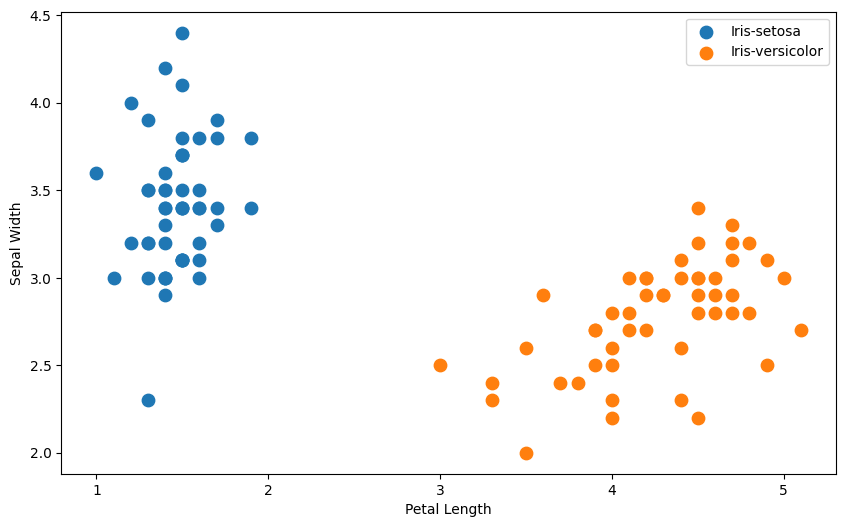

In [9]:
plt.figure(figsize=(10,6))
for specie in data['Species'].unique():
    specie_data = data[data['Species'] == specie]
    plt.scatter(specie_data['PetalLengthCm'],specie_data['SepalWidthCm'],s=80 ,label=specie )
    plt.legend()
    plt.xlabel("Petal Length")
    plt.ylabel("Sepal Width")

In [10]:
independent_features=['PetalLengthCm','SepalWidthCm','PetalWidthCm','SepalLengthCm']
dependent_feature='labels'

In [11]:

data_train,data_test=train_test_split(data,test_size=0.2)

X_train=data_train[independent_features]
Y_train=data_train[dependent_feature]

X_test=data_test[independent_features]
Y_test=data_test[dependent_feature]

X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((80, 4), (80,), (20, 4), (20,))

In [12]:
model = LogisticRegression()
model.fit(X_train,Y_train,verbose=True)
score = model.score(X_test, Y_test)
score

Epoch: 0, Loss: 1.6742275559702655
Epoch: 100, Loss: 0.11491692721434647
Epoch: 200, Loss: 0.022965873450001055
Epoch: 300, Loss: 0.005073732848901837
Epoch: 400, Loss: 0.0012471456832682955
Epoch: 500, Loss: 0.0003370425483031983
Epoch: 600, Loss: 9.832674020971991e-05


np.float64(1.0)

In [13]:
model.features_names

['PetalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'SepalLengthCm']

In [14]:
model.coef_

array([ 5.9546685 , -6.24678287,  6.05031571,  0.69995392])

In [15]:
model.intercept_

np.float64(-5.301948018740051)

In [16]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=uint8)

In [17]:
Y_test.to_numpy()

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [19]:
print(classification_report(Y_test, model.predict(X_test)))

            precision   recall f1-score  support
0                1.00     1.00     1.00        8
1                1.00     1.00     1.00       12

accuracy                           1.00       20
macro avg        1.00     1.00     1.00       20
weighted avg     1.00     1.00     1.00       20


<Axes: >

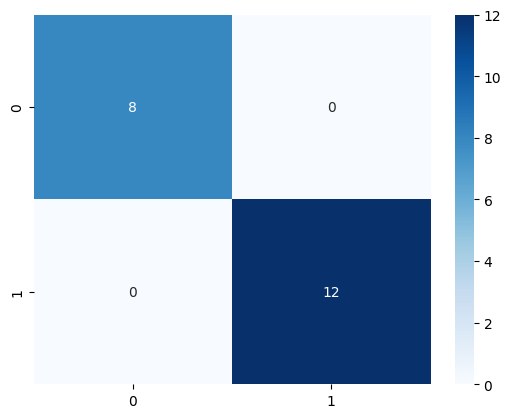

In [20]:
sns.heatmap(confusion_matrix(Y_test, model.predict(X_test)), annot=True, cmap="Blues", fmt=".0f")